<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/Zona_409_dep_estadual_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato_409.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido','Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos_409.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Cargo', 'Situação totalização', 'Zona', 'UF', 'Partido',
       'Nome candidato', 'Ano de eleição', 'Município', 'Votos nominais',
       'Data de carga'],
      dtype='object')
                       Nome candidato       Partido  Votos nominais
1431            CARLA SARDANO MORANDO          PSDB           23491
1497  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            9596
238        TEONÍLIO MONTEIRO DA COSTA            PT            8897
487         EDUARDO MATARAZZO SUPLICY            PT            3337
1702        ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1693


In [4]:
print(df_eleitos)

                          Nome candidato Partido  Votos nominais
16               MAÍRA MACHADO RODRIGUES    PSTU              15
19         PAULO CESAR DA SILVA SANT'ANA     PTB               0
20               WASHINGTON JOSE DA CRUZ     PTB               0
21                    MARCOS VITOR LESSA     PTB               0
22             LINDEMBERG MELO GONCALVES     PTB               0
...                                  ...     ...             ...
1918                     JOSE SILVA LIMA    AGIR               0
1919          CARLOS LUIS GUERRA DE LIMA    AGIR               0
1920       JOSE CARLOS FERREIRA DA SILVA    AGIR              35
1921          UBIRAJARA DE ARAUJO MORAIS    AGIR               0
1922  MARIA DE JESUS LOPES MARTINS SILVA     PTB               0

[784 rows x 3 columns]


In [5]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Suplente' 'Não Eleito' 'Eleito']
Total de candidatos eleitos: 94


In [6]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                        Nome candidato Partido  Votos nominais
67         DANILO MASCARENHAS DE BALAS      PL              92
76                     ELISABETH SAHÃO      PT              27
117             OSEIAS SANTOS DA SILVA     PSD             352
132    MARCOS ROBERTO DAMASIO DA SILVA      PL             420
149  MATHEUS COIMBRA MARTINS DE AGUIAR      PL             335


In [7]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                       Nome candidato       Partido  Votos nominais
1431            CARLA SARDANO MORANDO          PSDB           23491
1497  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            9596
238        TEONÍLIO MONTEIRO DA COSTA            PT            8897
487         EDUARDO MATARAZZO SUPLICY            PT            3337
1702        ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1693


In [8]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                       Nome candidato       Partido  Votos nominais  Posição
1431            CARLA SARDANO MORANDO          PSDB           23491        1
1497  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            9596        2
238        TEONÍLIO MONTEIRO DA COSTA            PT            8897        3
487         EDUARDO MATARAZZO SUPLICY            PT            3337        4
1702        ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1693        5


In [9]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


      Posição                   Nome candidato       Partido  Votos nominais
1431        1            CARLA SARDANO MORANDO          PSDB           23491
1497        2  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            9596
238         3       TEONÍLIO MONTEIRO DA COSTA            PT            8897
487         4        EDUARDO MATARAZZO SUPLICY            PT            3337
1702        5        ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1693


In [10]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([1431, 1497,  238,  487, 1702,  661,  614,  164,  727,  929, 1567,  166,
       1726,  786,  662,  505,  150,  132,  233, 1729,  117,  149,  573,  326,
        931, 1417,  479,  659, 1813, 1831,  274,  630,  971, 1081, 1748, 1383,
       1434, 1120,  969,  556, 1095,  994, 1876, 1499,  191,  157, 1058,  477,
         67,  873,  239,  234, 1039,  227, 1233, 1582, 1761, 1681, 1008, 1359,
       1746, 1347,  934,  486, 1428, 1872,   76, 1237,  344,  978, 1490,  156,
        418,  983, 1454, 1277,  546, 1049,  735,  791,  395, 1496,  552, 1556,
        580, 1253, 1659, 1183,  739, 1660, 1744, 1869,  868, 1243],
      dtype='int64')


In [11]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([1431, 1497,  238,  487, 1702,  661,  614,  164,  727,  929, 1567,  166,
       1726,  786,  662,  505,  150,  132,  233, 1729,  117,  149,  573,  326,
        931, 1417,  479,  659, 1813, 1831,  274,  630,  971, 1081, 1748, 1383,
       1434, 1120,  969,  556, 1095,  994, 1876, 1499,  191,  157, 1058,  477,
         67,  873,  239,  234, 1039,  227, 1233, 1582, 1761, 1681, 1008, 1359,
       1746, 1347,  934,  486, 1428, 1872,   76, 1237,  344,  978, 1490,  156,
        418,  983, 1454, 1277,  546, 1049,  735,  791,  395, 1496,  552, 1556,
        580, 1253, 1659, 1183,  739, 1660, 1744, 1869,  868, 1243],
      dtype='int64')


In [12]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           23491
       2        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            9596
       3             TEONÍLIO MONTEIRO DA COSTA            PT            8897
       4              EDUARDO MATARAZZO SUPLICY            PT            3337
       5              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1693
       6                  THIAGO REIS AURICCHIO            PL            1379
       7       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1086
       8                 PAULA NUNES DOS SANTOS          PSOL             948
       9         JOSÉ ROGERIO SOARES DOS SANTOS           MDB             811
      10                 BRUNO ZAMBELLI SALGADO            PL             759
      11                CARLOS ALBERTO GIANNASI          PSOL             758
      12             EDIANE MARIA DO NASCIMENTO          PSOL   

In [13]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           23491
       2        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            9596
       3             TEONÍLIO MONTEIRO DA COSTA            PT            8897
       4              EDUARDO MATARAZZO SUPLICY            PT            3337
       5              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1693
       6                  THIAGO REIS AURICCHIO            PL            1379
       7       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1086
       8                 PAULA NUNES DOS SANTOS          PSOL             948
       9         JOSÉ ROGERIO SOARES DOS SANTOS           MDB             811
      10                 BRUNO ZAMBELLI SALGADO            PL             759
      11                CARLOS ALBERTO GIANNASI          PSOL             758
      12             EDIANE MARIA DO NASCIMENTO          PSOL   

In [14]:
!pip install matplotlib

Codificação detectada: ISO-8859-1


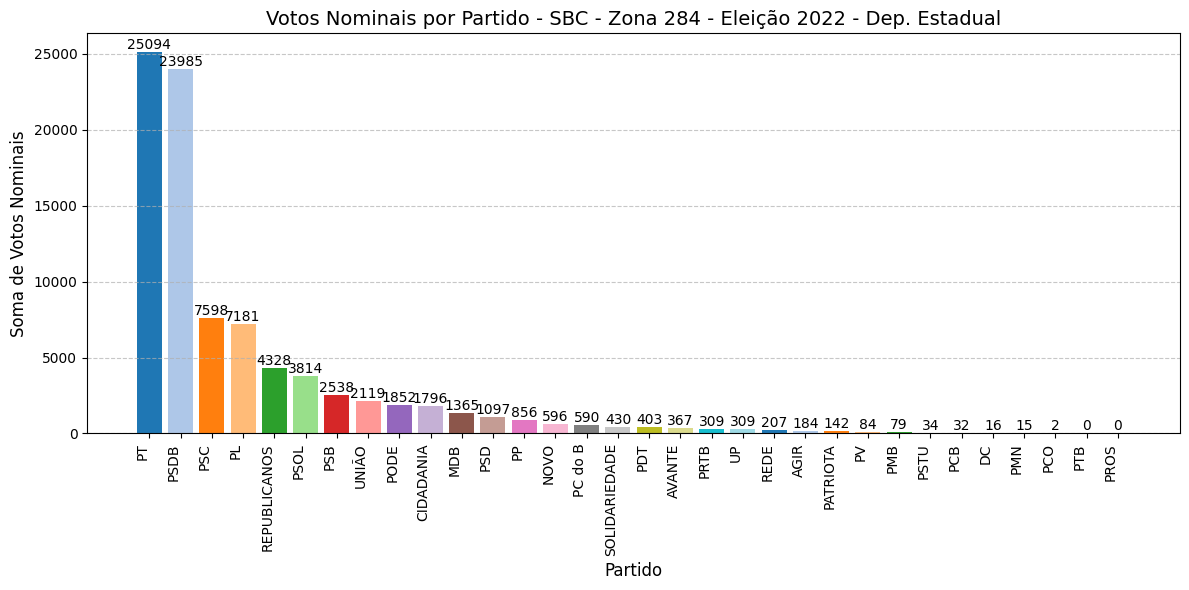

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_409.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_409 = pd.read_csv("/content/votacao_candidato_409.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_409 = df_409.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_409 = df_agregado_409.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_409['Partido'], df_agregado_409['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 284 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()